<a href="https://colab.research.google.com/github/atharvad38/email-classification/blob/main/Email_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


Import all the necessary libraries

In [17]:
email = pd.read_csv('spam_ham_dataset.csv')

I have named the dataframe as email

In [18]:
email.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [19]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [20]:
email.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


#Data Cleaning

In [21]:
email.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [22]:
email.drop(['Unnamed: 0'],axis=1,inplace=True)

Deleting the Unnamed column beacause it is useless

In [23]:
email.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [27]:
pd.isnull(email).sum()

label        0
text         0
label_num    0
dtype: int64

In [28]:
email.isna().sum()

label        0
text         0
label_num    0
dtype: int64

The above are the two ways of checking missing data. As you can see , there is no missing data in our dataset so we are good to go

In [29]:
email['num_label'] = email['label'].map({'ham':0,'spam':1})

we will consider spam as 1 and not spam as 0

We are making a new column beacause the model understands only numeric data

In [30]:
email.head()

,label,text,label_num,num_label
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,0
3,spam,"Subject: photoshop , windows , office . cheap ...",1,1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,0


#Data Visulaization

<Axes: xlabel='label', ylabel='count'>

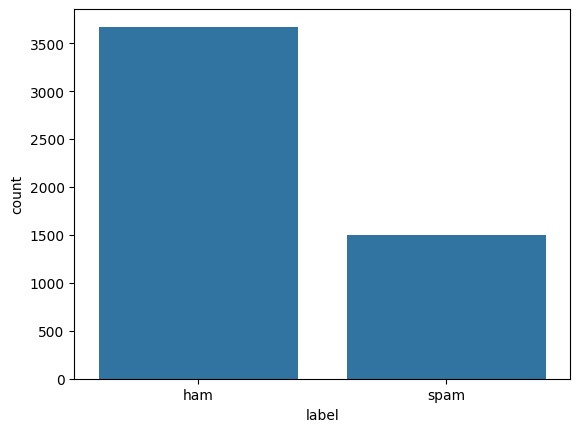

In [31]:
sns.countplot(x='label',data=email)

#Feature Engineering

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
X = vectorizer.fit_transform(email['text'])

Converting text to numeric data so that the model can understand

 The TfidfVectorizer converts text data into numeric data by transforming the text into a matrix of TF-IDF features. This numerical representation is essential for applying machine learning algorithms to text data.

#Splitting the data

In [36]:
from sklearn.model_selection import train_test_split
y = email['num_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [41]:
y_pred = model.predict(X_test)

#Model Evaluation

Accuracy: 0.9874396135265701


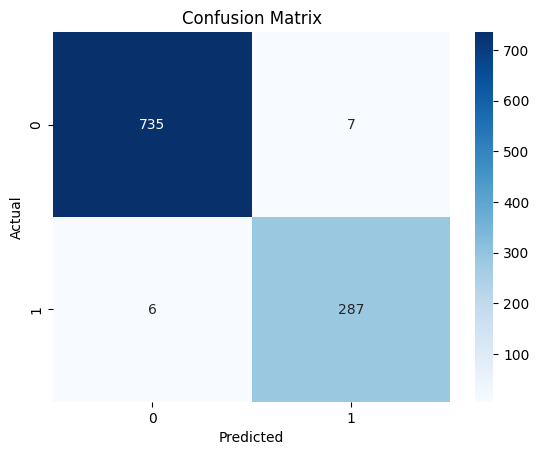

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

#Using the model we just trained

In [44]:
def Predict_spam(email_text):
  transformed_text = vectorizer.transform([email_text])
  prediction = model.predict(transformed_text)
  if prediction[0] == 1:
    return 'Spam'
  else:
    return 'Not Spam'



In [48]:
email_text = """ Participate daily

and get a chance to win a

Laptop, Smartphone & many more exciting prizes."""
result = Predict_spam(email_text)
print(result)

Spam
